<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/MultiRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [5]:
df= pd.read_csv('http://www.science.smith.edu/~jcrouser/SDS293/data/Boston.csv', index_col=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


##Simple Linear Regression

simple linear model with **medv** as the response and **lstat** as the predictor

In [6]:
lm = sm.OLS.from_formula('medv ~ lstat', df)
result = lm.fit()

In [7]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           5.08e-88
Time:                        01:45:06   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [8]:
result.rsquared, result.fvalue, result.params.Intercept, result.params.lstat

(0.5441462975864799, 601.6178711098955, 34.55384087938308, -0.9500493537579915)

###Predict with the model

In [9]:
new = pd.DataFrame([[1,5],[1,10],[1,15]], columns=['Intercept', 'lstat'])

In [10]:
new.head()

,Intercept,lstat
0,1,5
1,1,10
2,1,15


In [11]:
result.predict(new)

0    29.803594
1    25.053347
2    20.303101
dtype: float64

### Help function 

In [12]:
def predict(res, new):
    
    # Get the predicted values
    fit = pd.DataFrame(res.predict(new), columns=['fit'])
    
    # Get the confidence interval for the model (and rename the columns to something a bit more useful)
    ci = res.conf_int().rename(columns={0: 'lower', 1: 'upper'})
    
    # Now a little bit of matrix multiplication to get the confidence intervals for the predictions
    ci = ci.T.dot(new.T).T
    
    # And finally wrap up the confidence intervals with the predicted values
    return pd.concat([fit, ci], axis=1)

In [13]:
predict(result, new)

,fit,lower,upper
0,29.803594,28.317716,31.289472
1,25.053347,23.186975,26.919720
2,20.303101,18.056234,22.549967


### Visualization 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


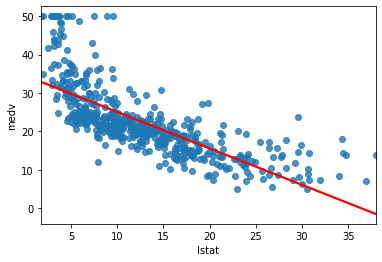

In [14]:
import seaborn as sns

sns.regplot('lstat', 'medv', df, line_kws = {"color":"r"}, ci=None)

### Plot the resisduals

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


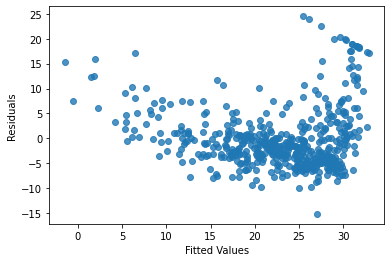

In [15]:
fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False)

noramlized the residuals

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


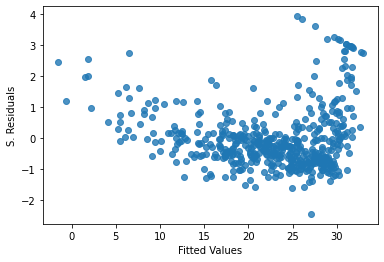

In [16]:
s_residuals = pd.Series(result.resid_pearson, name="S. Residuals")
sns.regplot(fitted_values, s_residuals,  fit_reg=False)

look for points with high leverage

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


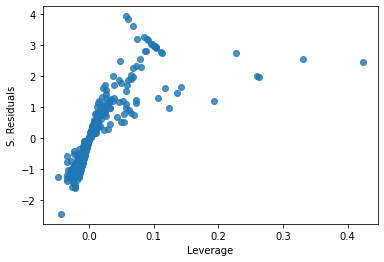

In [17]:
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
sns.regplot(leverage, s_residuals,  fit_reg=False)

### Multiple Linear Regression

In [18]:
model = sm.OLS.from_formula('medv~lstat + age', df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           2.98e-88
Time:                        01:47:49   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [19]:
# All columns (except medv, which is our response)
model = sm.OLS.from_formula('medv~'+'+'.join(df.columns.difference(['medv'])), df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          6.72e-135
Time:                        01:56:07   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

The result shows a high p-value in **age** and **indus**. We run a regression excluding these predictors

In [20]:
model = sm.OLS.from_formula('medv~'+ '+'.join(df.columns.difference(['medv','age','indus'])), df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          5.54e-137
Time:                        02:02:39   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0

### Interaction terms

In [25]:
print(sm.OLS.from_formula('medv~lstat*age', df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           4.86e-88
Time:                        02:10:32   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

###Using anova_lm() to quantify the extent to which the quadratic fit is superior to the linear fit.

In [29]:
lm.fit2 = sm.OLS.from_formula('medv ~lstat + np.square(lstat)', df).fit()

In [30]:
lm.fit = sm.OLS.from_formula('medv ~ lstat', df).fit()
print(sm.stats.anova_lm(lm.fit, lm.fit2))

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


F-statistic and p <<1 indicate that non-linear model is far better.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


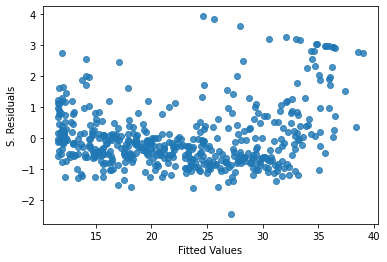

In [31]:
fitted_values = pd.Series(lm.fit2.fittedvalues, name="Fitted Values")
residuals = pd.Series(lm.fit2.resid, name="S. Residuals")
sns.regplot(fitted_values, s_residuals, fit_reg=False)

Model for a  fifth-order polynomial fit

In [32]:
sm.OLS.from_formula('medv ~ '+ '+'.join(['np.power(lstat,'+str(i)+')' for i in range(1, 6)]),df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          8.73e-122
Time:                        02:25:41   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             67.6997      3.604     18.783      0.000      60.618      74.781
np.power(lstat, 1)   -11.9911      1.526     -7.859      0.000     -14.989      -8.994
np.power(lstat, 2)     1.2728      0.223      5.703      0.000       0.834       1.711
np.power(lstat, 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
np.power(lstat, 4)     0.0017      0.000      4.143      0.000       0.001       0.003
np.power(lstat, 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###Using Log function 

In [33]:
sm.OLS.from_formula('medv ~ np.log(rm)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           1.22e-64
Time:                        02:26:34   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(rm)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## explore Carseats data

###Quality the predictors

In [36]:
df2 = pd.read_csv('http://www.science.smith.edu/~jcrouser/SDS293/data/Carseats.csv')
df2.head(20)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [39]:
print(sm.OLS.from_formula('Sales~ Income:Advertising:Age+'+'+'.join(df2.columns.difference(['Sales'])),df2).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     224.5
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          5.92e-166
Time:                        02:41:08   Log-Likelihood:                -567.47
No. Observations:                 400   AIC:                             1161.
Df Residuals:                     387   BIC:                             1213.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


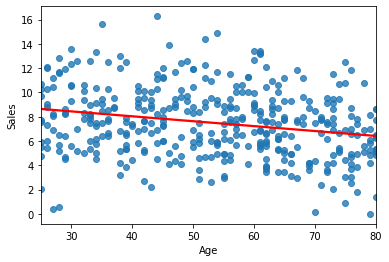

In [43]:
import seaborn as sns

sns.regplot('Income', 'Sales', df2, line_kws = {"color":"r"}, ci=None)